<a href="https://colab.research.google.com/github/lovegohome/TIL/blob/main/020_SQL_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding
| 2021. 06. 15. (화)



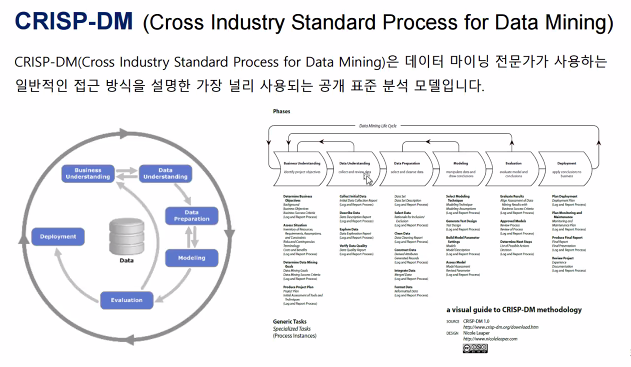

데이터를 활용하는 방법론 : CRISP-DM

(Cross Industry Standard Process for Data Mining)

- Business Understanding
- **Data Understanding**
  - 흙 묻은 양파 뽑고 여러 면으로 보는 시도
- Data Preparation
- Modeling
- Evaluation
- Deployment

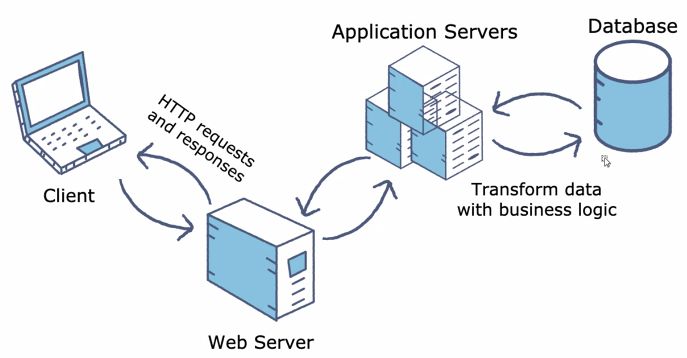

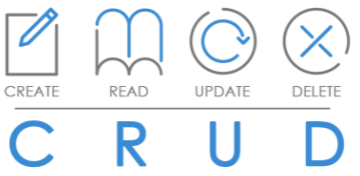

어제까진 Create를 한 테이블에서만 했었다. 
오늘 여러 테이블을 통해 create 해본다.

* 복습 (My SQL)


In [ ]:
use classicmodels;
이걸 사용할 거로 미리 선언, 습관화 하자. 

show tables;

In [ ]:
select * from employees;
select firstName from employees;
select firstName, lastName from employees;
select firstName, lastName from employees where employeeNumber=1002;
select employeeNumber, firstName, lastName from employees where employeeNumber>=1300;

select city from offices where offices.officeCode = '1';
select city, phone from offices where offices.officeCode = '1';

Join에는 여러 가지 방법이 있는데, 그중 많이 사용되는 join으로 [left join]이 있다. 

left join은 특정 테이블 정보를 기준으로 타 테이블을 결합한다. 

In [ ]:
select customers.customerNumber, orders.orderNumber, customers.country from orders 
left join customers on customers.customerNumber = orders.customerNumber;

### 1-1. 조건(on, where)

[on]을 통해서 조건을 제시할 수 있다. 두 테이블이 공통으로 갖고 있는 중복된 값을 기준으로 [select]를 설정할 수 있는 예가 위와 같다. 그리고 select 안에는 여러가지 값을 넣을 수 있다. 

(교재 p.50)

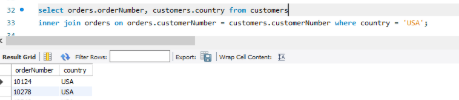

[on] 외에도 [where]을 조건으로 데이터를 뽑을 수 있다. 


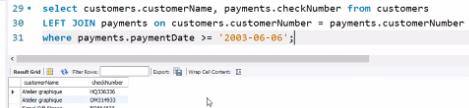

시간을 기준으로 거래내역이 있는 고객만 보고 싶을 때. 
이런 식으로 필요한 것들만 join으로 모아 만든 마스트테이블을 추려나가는 작업을 한다. 그리고 expert를 통해 저장을 하면 데이터 정제 완료.

이렇게 완료를 하면 이후에는 분석을 시작하게 된다. 


- Inner join, right join

그리고 위와 같이 [inner join] 방법을 사용할 수 있으나 가장 많이 사용하는 것은 [left join]이다. 그래서 이후로는 [left join]을 주로 이용한다. inner join으로 merging을 사용할 수도 있지만 주로 우리는 Pandas에서 구현되는 pd.merge()가 있기 때문에 그걸 활용한다. 

[right join]또한 활용도가 떨어지므로 left join을 활용할 것. 

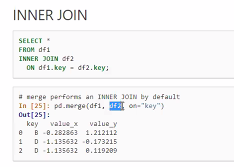

* full join - database schema

DB의 스키마가 바뀌면 없던 column도 생기고, 있던 column도 사라지면서 원래의 철학에 변경이 생긴다. 그 당시의 철학을 이해하기 위해 DBA에게 5년치 자료를 뽑아달라고 하면, 테이블을 만들어준다. 

그 때의 데이터는 null 값 등 엉망이다. 그리고 그냥 합치면 내용을 알 수가 없다. 
그렇기 때문에 [full join]은 현실에서 쓸 일이 없다. 

* 때로 필요한 쿼리는 저장한다. 

즐겨찾기 or sql_script로 저장 
(쿼리란 데이터베이스에 정보를 요청하는 문장)

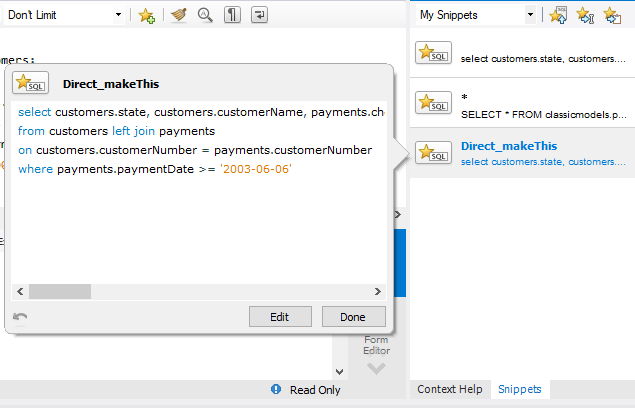

## 2. Workbench - Schemas 생성

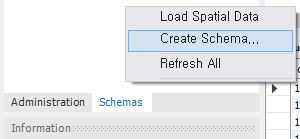

1) 스키마 목록에서 create

2) 이름 지정

3) Table Data Import Wizard

(갖고 오는 파일에 한글이 있다면 unit8(?)로 설정하는 과정이 필요하지만 지금은 영어만 사용되고 있기 때문에 바로 next, 그러면 위자드가 알아서 컬럼과 로우 만듦)

4) 새로고침 틈틈이. 

5) 그러면 바로 [use tip;] 선언하는 습관.

	use tip;
	select * from tips;

6) 이렇게 해놓으면 판다스와 비교할 준비 끝. 

7) 혹시 null 값, 빈 자리가 있다면 수정

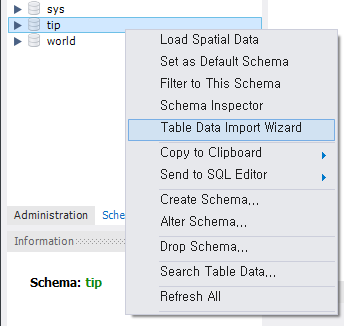

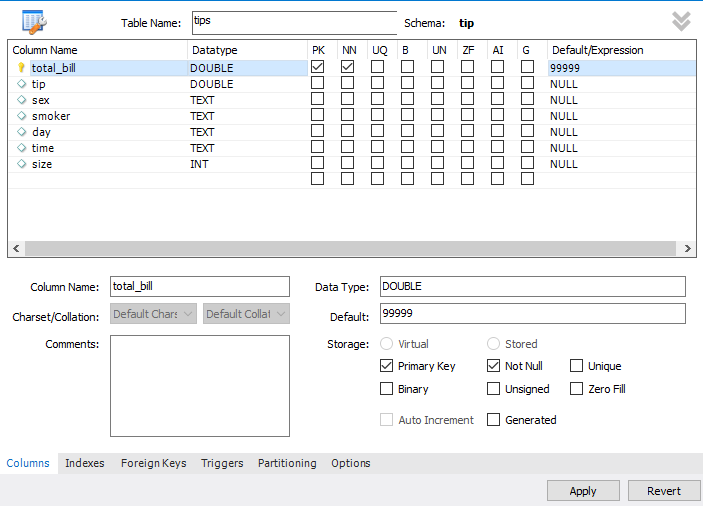

이 작업을 할 때, 해당 창이 켜져있으면 작업이 안되므로 창을 끄고 진행한다. 

Create(p.67)
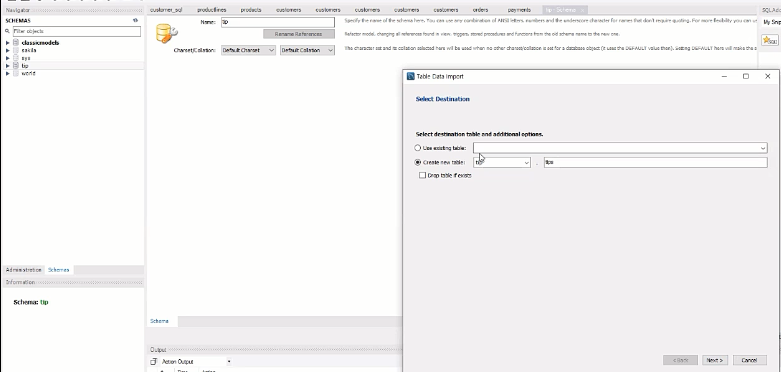

create schema - table data import wizard 

망치 - 이름 바꾸기 

In [ ]:
select customers.state, customers.customerName, payments.checkNumber 
from customers left join payments 
on customers.customerNumber = payments.customerNumber
where payments.paymentDate >= '2003-06-06'

이렇게 하면 흙 묻은 채소에서 흙 털고, 지렁이 때어낸 상태.
향후 이런 데이터를 갖고 Pandas에서 지난 주에 배웠던 파뿌리 다듬는 것, imitation, encoding, 상관관계 보는 것 등
통계적으로 PCA 하는 걸 직접 해보면서 해보는 것. 

가설검정은 샘플을 뽑았을 때 feature들 간의 유의성을 보기 위해 가설 검증이 필요함. 모든 데이터, 모집단에서는 가설 검증 필요 없음. 

데이터의 성격이 뉴메리컬, 케테고리컬 그에 따라 구슬이 떨어지듯 방법이 결정되는 거다. 

## Pandas에서 SQL 연결

In [ ]:
!cd
pip install PyMySQL==1.0.0
import pymysql.cursors # Connect to the database

In [ ]:
connection = pymysql.connect(host='localhost',
        user='root',
        password='hanu1004',
        db='classicmodels',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
# web에서 localhost의 classicmodels DB와 연결하는 거다.
# 그럼 SQL에서 Query를 갖고 온다. 

- `user`: user name
- `passwd`: 설정한 패스워드
- `host`: DB가 존재하는 host / host='localhost' or '127.0.0.0'
- `db`: 연결할 데이터베이스 이름
- `charset`: 인코딩 설정
- `cursors`: 연결한 DB와 상호작용하기 위해 `cursor` 객체를 생성해주어야 합니다.데이터 분석가에게 익숙한 데이터프레임 형태로 결과를 쉽게 변환할 수 있도록
  딕셔너리 형태로 결과를 반환해주는 `DictCursor`를 사용하겠습니다.

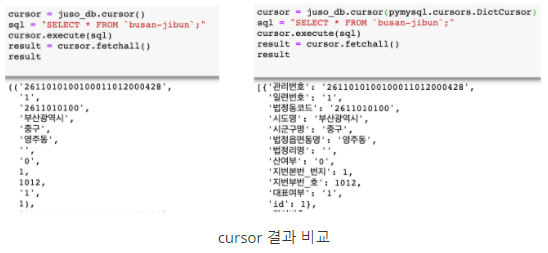

`DictCursor`가 아닌 일반 `cursor`를 사용하면 결과가 일반적으로는 튜플 형태로 리턴됩니다.

In [ ]:
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "select count(productCode) as N_PRODUCTS from products;"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

SELECT 명령을 위해 SQL 문을 따로 변수에 넣어주고 `cursor.execute(sql)` 을 사용해 SQL를 실행합니다.
실행한 결과를 `fetch____()`을 이용해 받아옵니다.
**try ... finally ~** : finally절은 try문 수행 도중 예외 발생 여부에 상관없이 항상 수행합니다. 보통 finally절은 사용한 리소스를 close해야 할 때에 많이 사용합니다.

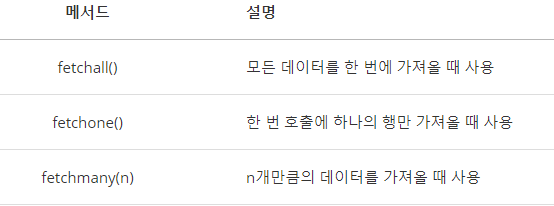

**※**  fetchall 하기 전에 몇개를 보여주게 될지 확인하는 습관.
너무 많은 걸 갖고 오게 되면 컴퓨터가 안 좋아질 수 있음. 부하를 많이 줘서.
쿼리할 내용이 어느 정도일지 봐야 한다. 

cf. try .. except ~ 
try 블록 수행 중 오류가 발생하면 except 블록이 수행된다. 하지만 try 블록에서 오류가 발생하지 않는다면 except 블록은 수행되지 않는다.

In [ ]:
import pymysql.cursors
import pandas as pd

In [ ]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='root', 
    password='hanu1004', db='tip', 
    charset='utf8', autocommit=True, 
    cursorclass=pymysql.cursors.DictCursor)
try:
   with conn.cursor() as curs:  
      sql = "select total_bill  from tip.tips where tip >= 7;"
      curs.execute(sql)
      rs = curs.fetchall()
      print(rs)

      # DB에서 받아온 값을 DataFrame에 넣음    
      df = pd.DataFrame(rs)
      print(df)
      # df.to_csv('query.csv')

finally:
   conn.close()

[ autocommit=False ] 로 되어 있으면 rollback을 할 수 있는 건데
검색에서 rollback 할 일은 없어서 True로 해도 된다.

**※** 그런데 만약에 insert, delete, drop DB 이런 걸 한 상태에서
[ autocommit=True ] 해 놓으면 못 돌아간다 
자동으로 commit 시키는 역할을 한다. (아마 git bash에서의 commit을 얘기하는 것 같다.)

 rollback = 뒤로 돌아가기 버튼 같은 느낌, 원 상태로 돌아가는 것. 



이렇게 연결하고 저장하는 걸 할 줄 알면
null값 없애고, feature 보고, 상관계수 보고, PCA도 하는 과정을 하게 된다. 

### Pandas as pd

파이썬을 통해 데이터 분석을 할 때 유용한 라이브러리(Python Data Analysis Library)로 dataframe을 다룬다. (dataframe 생성, 접근, 삭제, 수정 등)

### Seaborn as sns

Matplotlib를 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지. 

**연습을 위한 샘플 데이터를 로드**

In [ ]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [ ]:
plt.boxplot(t_bill, labels=['total_bill'])
plt.show()
# vs
t_sns_bill = sns.boxplot(x='total_bill', data=tips)

In [ ]:
plt.boxplot(t_tips, labels=['tip'])
plt.show()
# vs
t_sns_tips = sns.boxplot(x='tip', data=tips)

In [ ]:
import matplotlib.pyplot as plt   # seaborn - regplot / hist()
import seaborn as sns   # - regplot, distplot
import pandas as pd   # describe
import pandas_profiling   # tips.profile_report()

python seaborn의 regplot은 scatter plot과 line plot을 함께 볼 수 있는 데이터 시각화 방법입니다. (cf. regression)

In [ ]:
sns.regplot(x="size", y="tip", data= tips)
sns.regplot(x="total_bill", y="tip", data= tips)

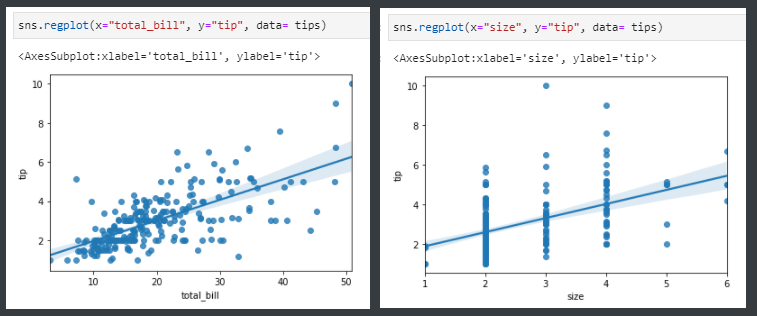

In [ ]:
sns.distplot(x=t_bill, bins=50)   # distributions of data
# FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).   warnings.warn(msg, FutureWarning)
sns.displot(x=t_bill, bins=50)
sns.histplot(x=t_bill, bins=50)    # bin = 막대기 갯수

pd.crosstab(index=tips['smoker'], columns='count') # 도수분포표, 교차표

pd.crosstab(tips.smoker, tips.sex)    # array 형식의 데이터

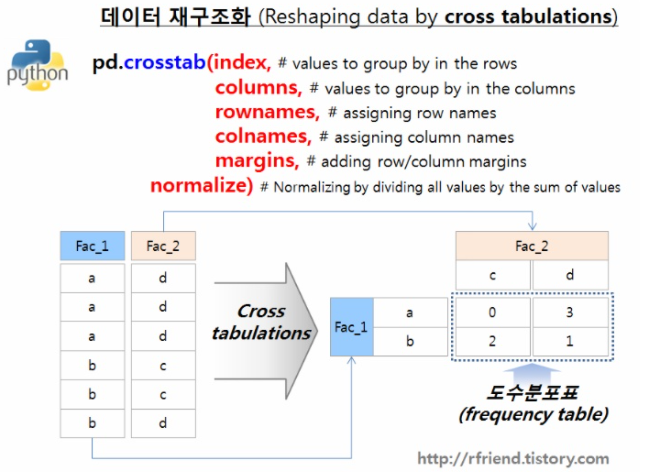

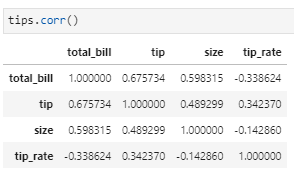

In [ ]:
SELECT day, AVG(tip), COUNT(*)
FROM tips
GROUP BY day;

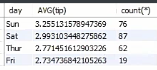

In [ ]:
tips.groupby("day").agg({"tip": np.mean, "day": np.size})

agg : aggregate(합계, 총액)

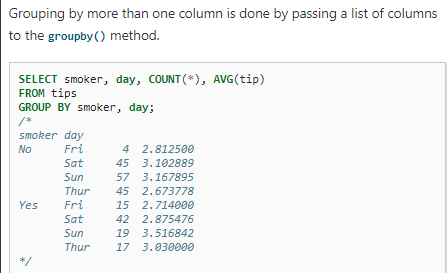

위와 같이 나오지 않아서, **order by**를 넣으니깐 됨 

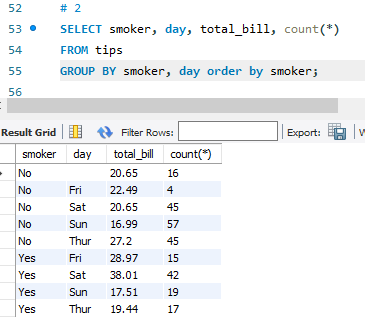

In [ ]:
!pip install PyMySQL

Requirement already satisfied: PyMySQL in c:\users\user\anaconda3\envs\multi2\lib\site-packages (1.0.0)

이미 설치 됐다고 나옴 / 이전에 설치했던 거 같다.

In [ ]:
import pymysql # 불러 올 때 

SQL workbench에서 내용 알고 작업 하면서 쿼리가 결정되면 
pymysql로 DB에 연결해서 필요한 것만 가져다가 모델 연습을 하게 된다. 

오늘 한 것

- Join  (p.45~49) 

  [classicmodels.customers]와 [classicmodels.orders]가 겹치는 지점인 
  "customerNumber"를 갖고 join을 해보자. 

  - 주로 left join을 활용한다. 

  - 그 외에도 inner join을 종종 사용하는데, 그 이유는 
    merge를 할 때 중간이 되는 키 값을 찾기 위해 inner join을 하는 거다. 
    ex) credit card 예시 통해서 볼 수 있다. 

두 가지 데이터를 갖고 온다고 하면 

In [ ]:
#pd.merge(data1, data2, on='key', how='outer')
data_sum = pd.merge(data2, data1, on='ID', how='left')

이렇게 합칠 때 중심되는 key가 없다면

In [ ]:
for i in range(0, 30000):
    data2.loc[i,['ID']]=i+1

이렇게 만들어서 2개의 data set을 merge를 해버림. 그때 inner join을 한다. 

DB server 연결 : account, DBs

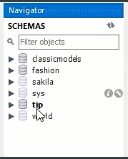

- SQL - Pandas command comparison
  Pandas의 조상은 SQL 
  Python은 언어. 한국어 쓰는 사람들 마다의 각 조상
- groupby

## CF. 

- 오늘 활용할 자료 : 
  https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql
- https://yurimkoo.github.io/python/2019/09/14/connect-db-with-python.html

> **MySQL workbench** vs **Pandas**
>
> Pandas의 할아버지는 SQL

- MySQL 켤 때 error : conection error

  > 참고 : zel0rd.tistory.com/141
  >
  >-  서비스 - 실행

  

- MySQL - table' Columns [**PK**]

  Primary key(이하 PK)는 한 개 혹은 여러 개의 칼럼으로 테이블 내의 각 행들을 구별하기 위한 목적을 갖고 있다.
  PK는 그 자체만으로 Unique 하며 만약 여러 개의 Column이 PK로 묶여 있다면, 해당 값들의 조합이 반드시 Unique 해지게 된다. 
  PK는 NULL 값을 갖을 수 없고(NOT NULL), Unique key라는 특징을 갖게 된다. 단순하게는 NOT NULL & UNIQUE == PK 라고 생각하면 편하다. 물론 좀더 디테일하게 보자면 차이가 있다. 
  MySQL에서는 Int 작업이 빠르기 때문에 PK는 Int형으로 지정하는 것이 좋다. 
  
  출처: https://jins-dev.tistory.com/entry/RDB-MySQL-에서의-Primary-Key-란 [Jins' Dev Inside]



- 오늘의 멘트

  > 문제는 해결하라고 있는 거다. 

- mtSQL에선 유니온 지원 안한다는 거 같다. 

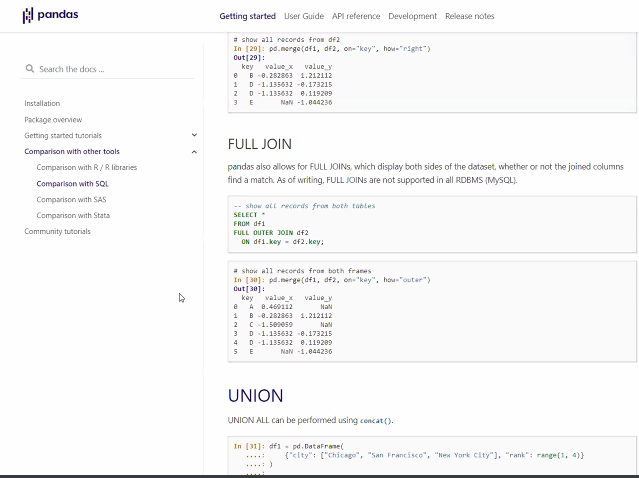

- DBA? 테이블을 만들어준다. 

  디비스키마 다 바뀌면서 현재의 철학에 맞춰서 만들면.. 그게 없는 컬럼도 생기고, 없어지고 엉망이 된다. 
  그걸 짧은 시간 안에 분석을 할 수 없다. 그래서 DBA에게 불량품이든 정품이든 고객리스트 뽑아주세요,  한다. 5년치.

  full join 하면 현실에서 쓸 일이 없다. 

- 두개 테이블 머지할 때, 중간 키값 갖기 위해 이너조인한다.  / 이게 크리딧카드 그 데이터에 있다.
  인덱스 없을 때 키를 갖고 머징 한다. 

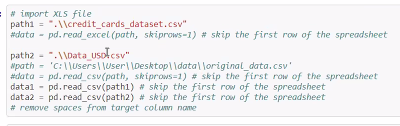

23개짜리랑 10개짜리 머징. 

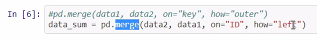

그 중심 되는 키 줘야 하는데 없으면 아이디를 만들어 버린다. 

그래서 이걸 중심으로 해서 두개의 데이터 셋을 머징한다. 

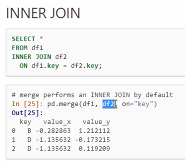

근데 이게 판다스에서 머징 메소드 있다.
sql문법이 판다스에서 다 구현이 된다. 그래서 둘 중에 하나만 알면 되는데, 판다스가 더 친숙.
그래서 판다스를 활용하는 걸 더 알려주려고 한다. 
전문적인 단계 될 때는 더 검색하고 공부하는 걸로. 
활용은 판다스 가서 하자 :) 